# Homework for Section 8.6
## Seong-Eun Cho
#### Section 1

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# Problem 8.29

def haar_son(j,k,x):
    if x >= k/(2**j) and x < (k+1)/(2**j):
        return 1
    else:
        return 0

def sample(f, n):
    k = np.linspace(0, 1, 2**n, endpoint=False)
    return f(k)
def func(a):
    n = int(np.log2(len(a)+1))
    return lambda x: sum([a_k*haar_son(n, k, x) for k,a_k in enumerate(a)])

## Problem 8.___

In [7]:
# your code here, per problem
T_8 = np.array([[1,1,1,1,1,1,1,1],[1,1,1,1,-1,-1,-1,-1],[1,1,-1,-1,0,0,0,0],[0,0,0,0,1,1,-1,-1],[1,-1,0,0,0,0,0,0],[0,0,1,-1,0,0,0,0],[0,0,0,0,1,-1,0,0],[0,0,0,0,0,0,1,-1]]).T
a = np.array([2,4,3,3,1,1,-3,-3])
np.linalg.inv(T_8)@a

array([ 1.,  2.,  0.,  2., -1.,  0.,  0.,  0.])

In [8]:
#8.33 FWT
def FWT(a):
    l = int(np.log2(len(a)))
    A = [a]
    for j in range(l):
        a_k = 1/2*(A[j][::2]+A[j][1::2])
        A.append(a_k)
    B = []
    for j in range(l):
        b_k = 1/2*(A[j][::2]-A[j][1::2])
        B.append(b_k)
    return np.concatenate((A[-1],np.concatenate(B[::-1])))


In [9]:
FWT(np.array([-2,4,2,-3]))

array([ 0.25,  0.75, -3.  ,  2.5 ])

In [10]:
FWT(a)

array([ 1.,  2.,  0.,  2., -1.,  0.,  0.,  0.])

In [16]:
#8.34
def haar_son(j,k,x):
    if x >= k/(2**j) and x < (k+1)/(2**j):
        return 1
    else:
        return 0
def haar_daughter(j,k,x):
    if x >= k/(2**j) and x < (2*k+1)/(2**j*2):
        return 1
    if x >= (2*k+1)/(2**j*2) and x < (k+1)/(2**j):
        return -1
    else:
        return 0
    
    
def b_index(i,k,c):
    return c[2**i-1:2**(i+1)-1][k]

def fgfunc(c, j=0):
    if j < 0:
        j = 0
    n = 2**j
    a = c[0]
    b = c[1:]
    l = int(np.log2(len(c)))
    f_j = lambda x: a*haar_son(0,0,x) + \
                    sum([sum([b_index(i,k,b)*haar_daughter(i,k,x) \
                    for k in range(2**i)]) 
                    for i in range(j)])
    g_j = lambda x: sum([sum([b_index(i,k,b)*haar_daughter(i,k,x) \
                    for k in range(2**i)]) \
                    for i in range(j,l)])
    
    return f_j, g_j

In [17]:
#8.35
def f_transform(f, l, i):
    wavelets = FWT(sample(f,l))
    f_j, g_j = fgfunc(wavelets, j=i)
    return f_j, g_j

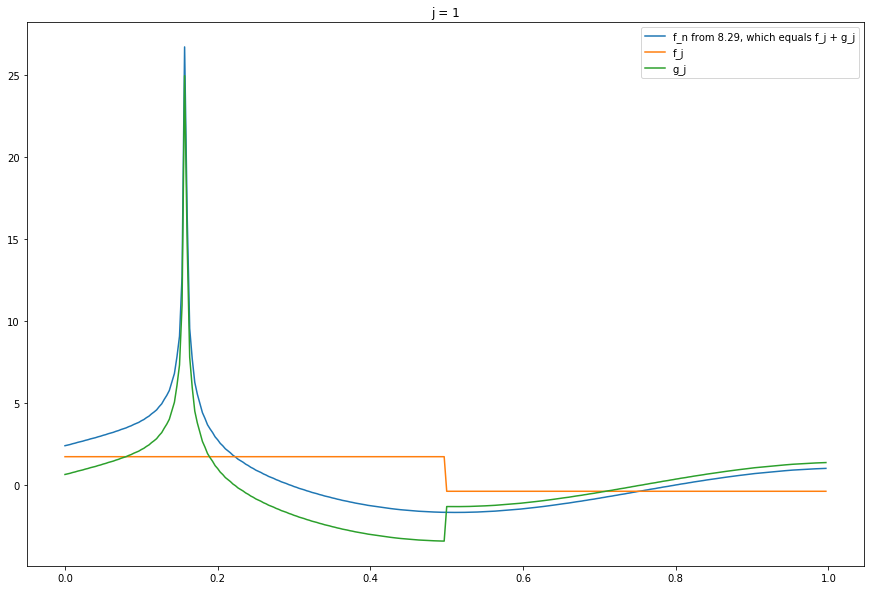

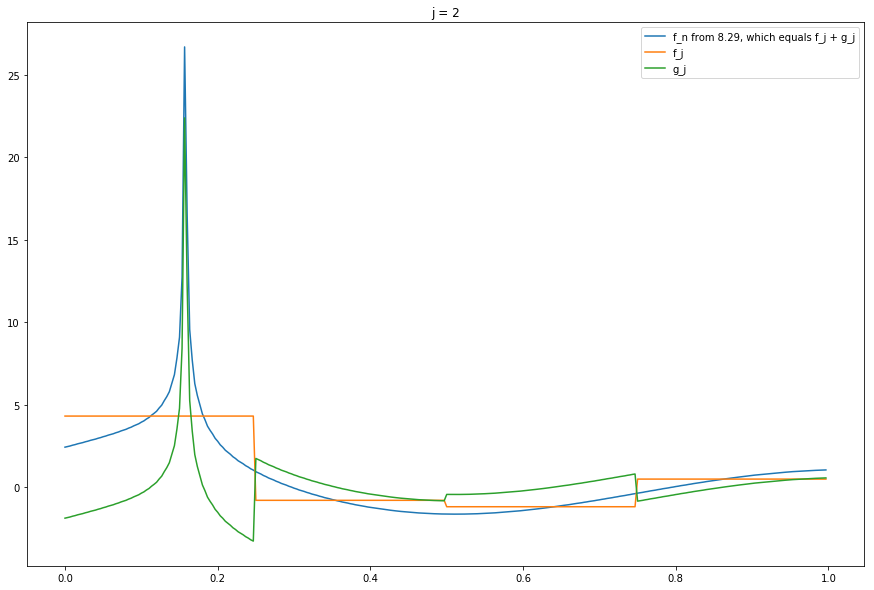

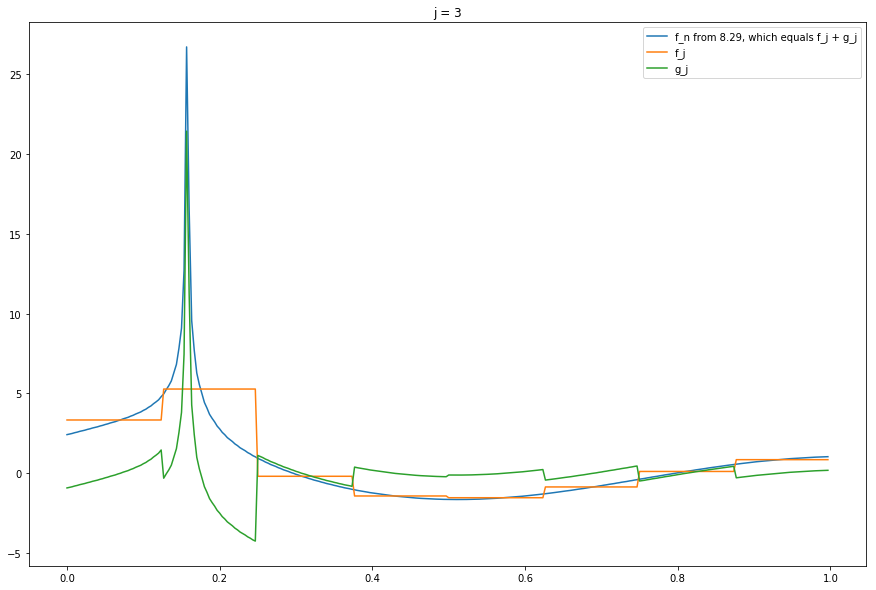

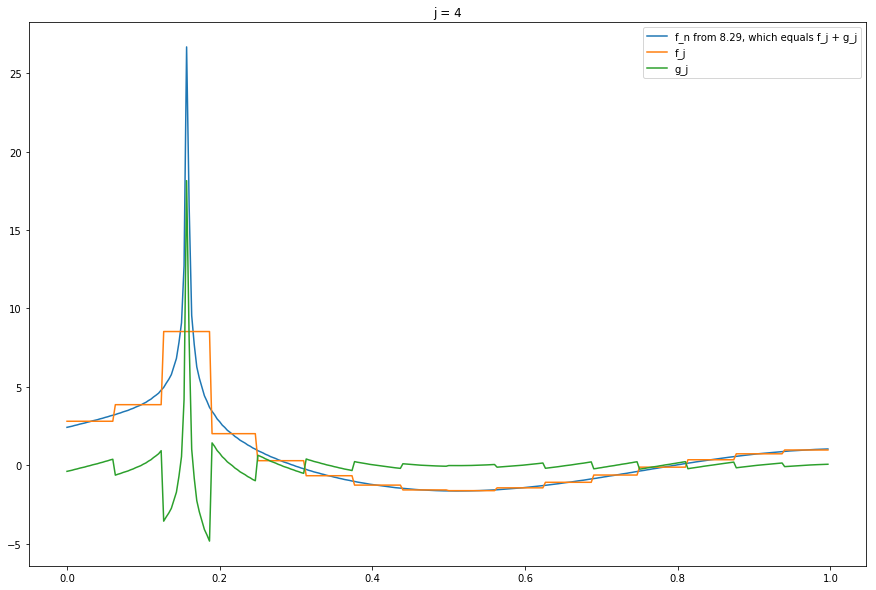

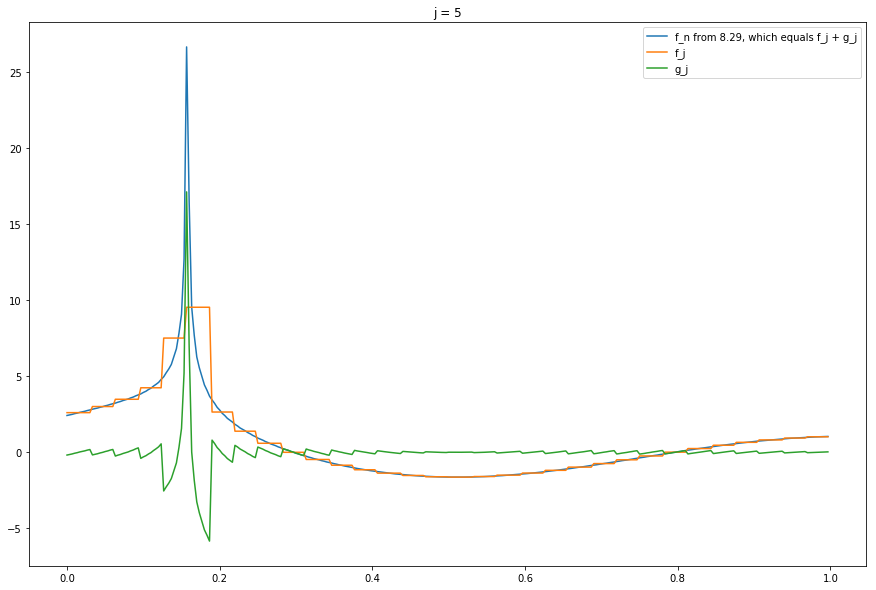

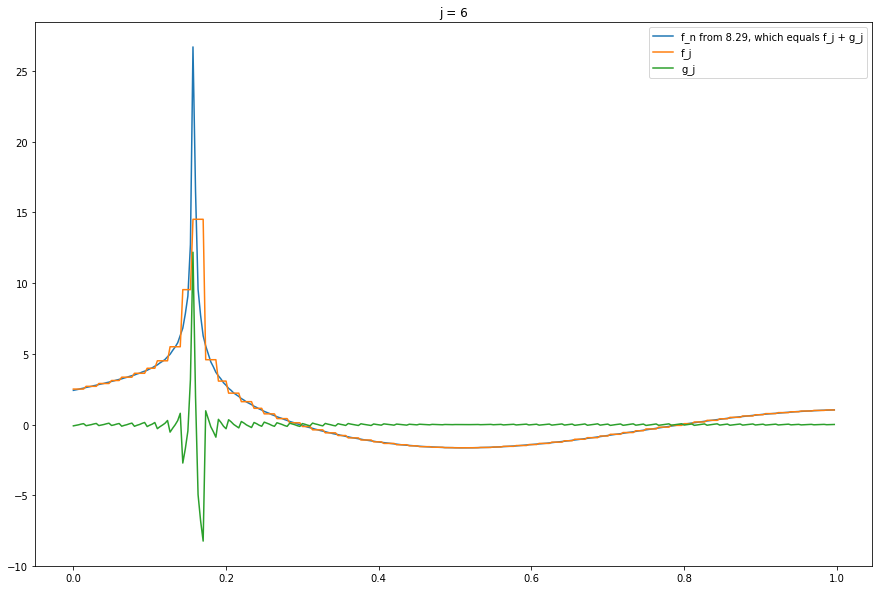

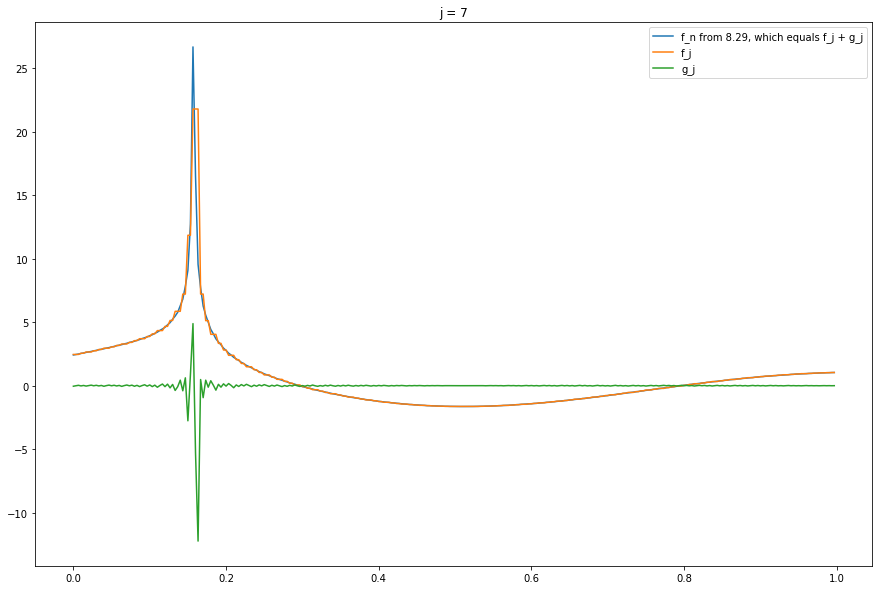

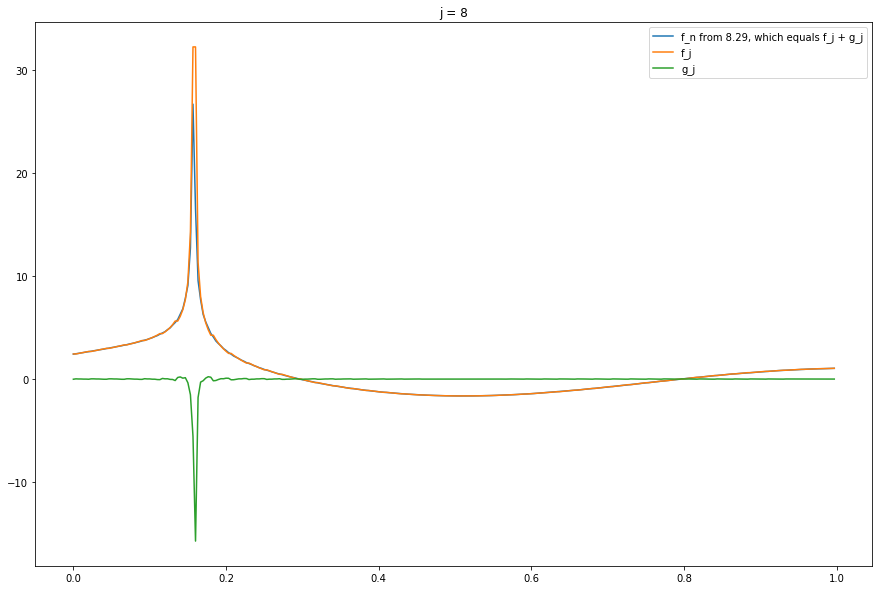

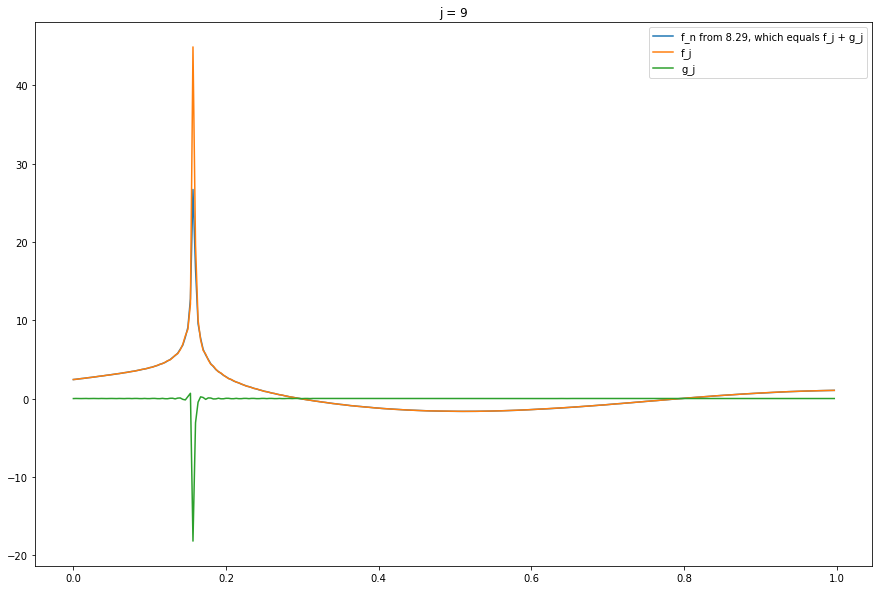

In [18]:
f = lambda t: np.sin(2*np.pi*t - 5)/(np.sqrt(abs(t - np.pi/20)))

for n in range(1,10):
    t = np.linspace(0, 1, 300, endpoint=False)
    f_l, g_l = f_transform(f, 10, n)
    f_n = func(sample(f,10))
        
    #print(wavelets)
    plt.figure(figsize=(15,10))
    #plt.plot(t, f(t))
    plt.plot(t, [f_n(t_k) for t_k in t], label="f_n from 8.29, which equals f_j + g_j")
    plt.plot(t, [f_l(t_k) for t_k in t], label="f_j")
    plt.plot(t, [g_l(t_k) for t_k in t], label="g_j")
    plt.legend()
    plt.title("j = " + str(n))
    plt.show()

In [14]:
#8.36
def sample2(f, n, a, b):
    k = np.linspace(a, b, 2**n, endpoint=False)
    return f(k)
def f_transform2(f, l, i, a, b):
    wavelets = FWT(sample2(f,l,a,b))
    f_j, g_j = fgfunc(wavelets, j=i)
    return f_j, g_j

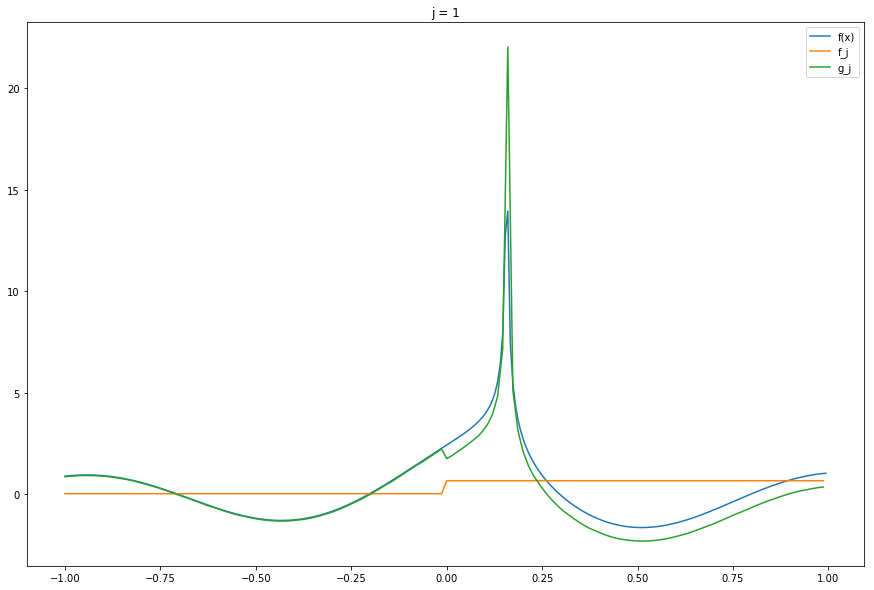

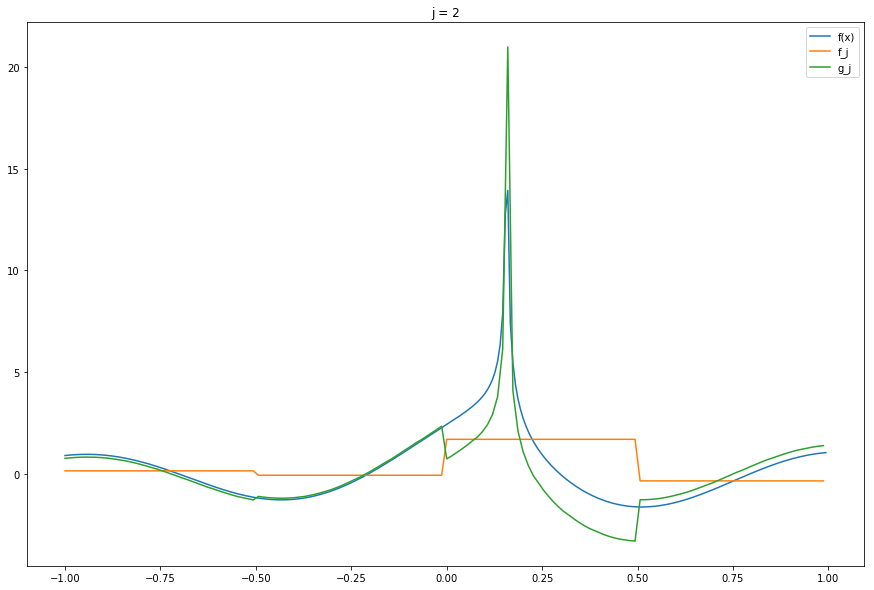

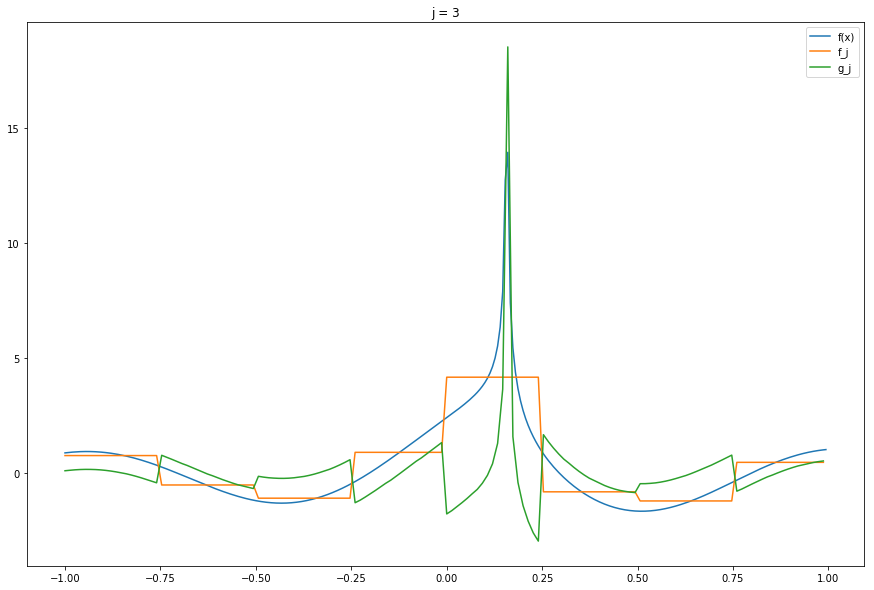

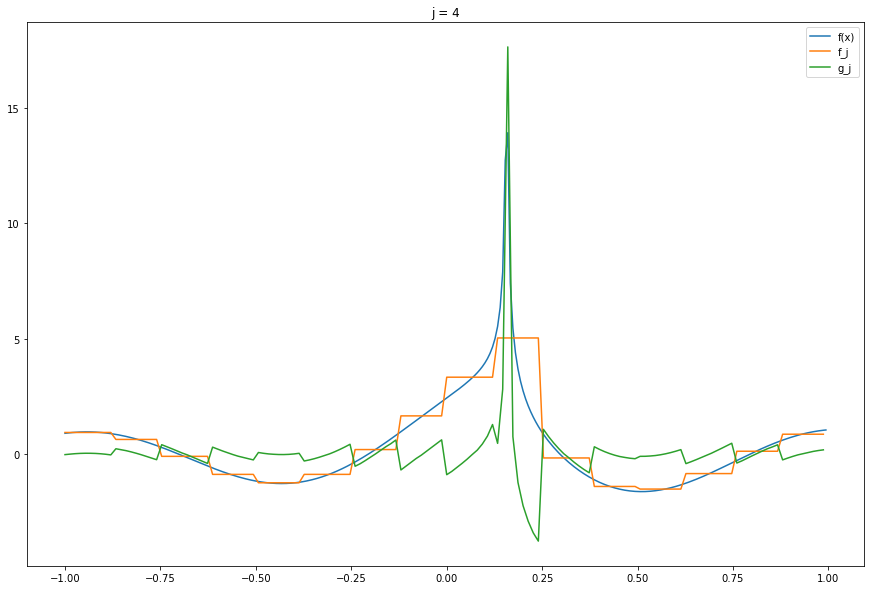

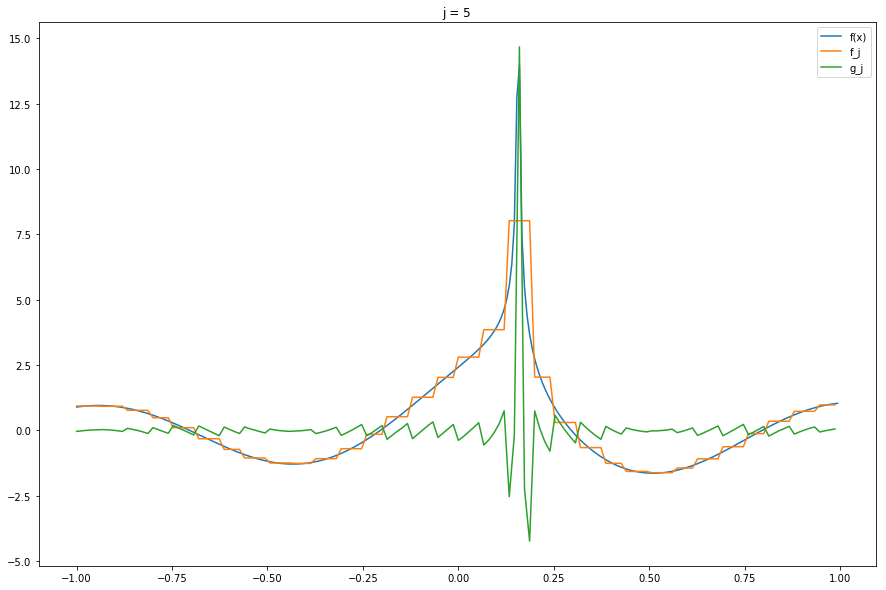

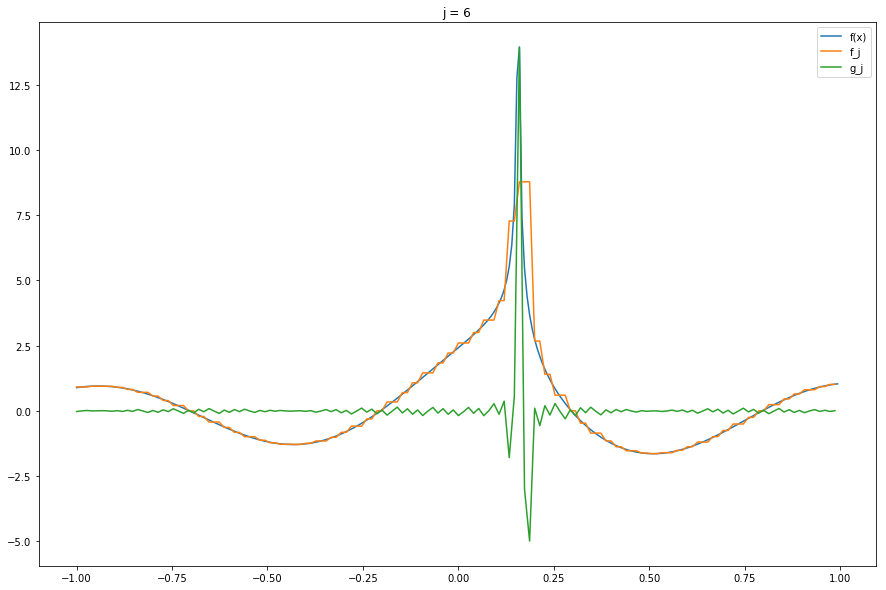

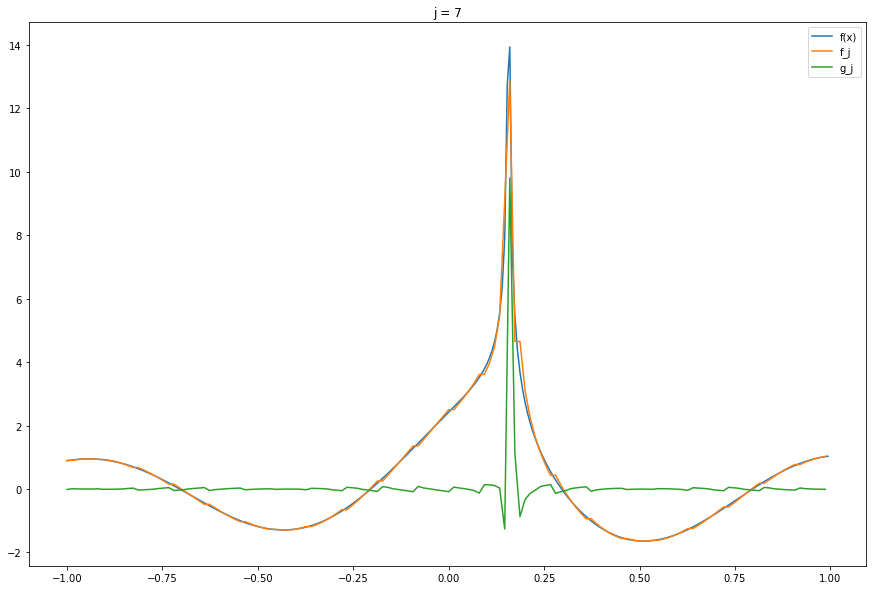

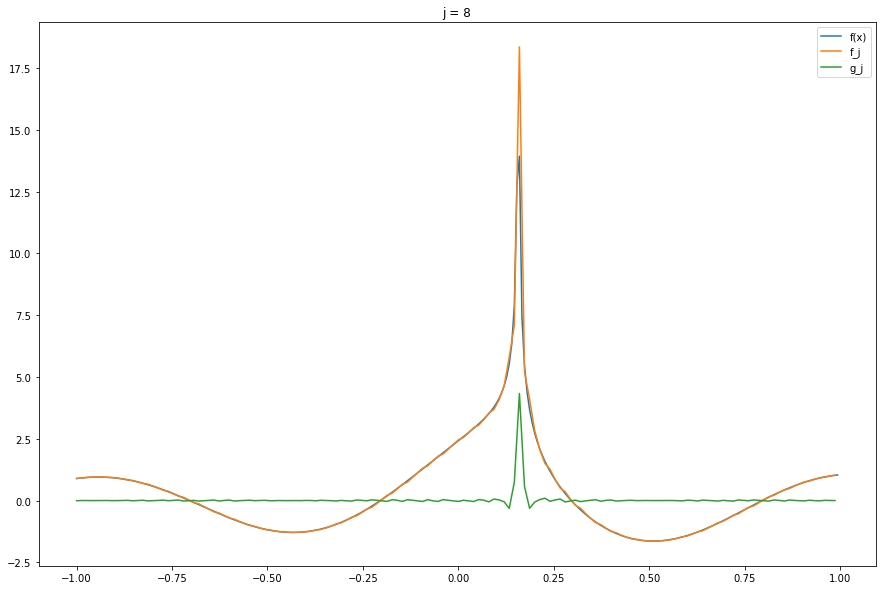

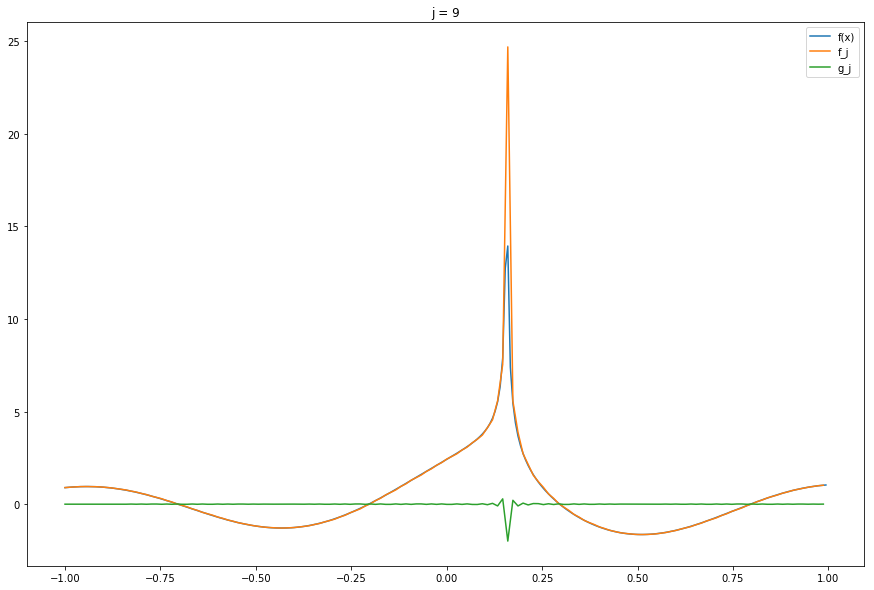

In [15]:
for n in range(1,10):
    t = np.linspace(-1, 1, 300, endpoint=False)
    f_l, g_l = f_transform2(f, 10, n,-1,1)
        
    #print(wavelets)
    plt.figure(figsize=(15,10))
    plt.plot(t, f(t), label="f(x)")
    plt.plot(t[::2],[f_l(t_k) for t_k in t][150:], label="f_j")
    plt.plot(t[::2],[g_l(t_k) for t_k in t][150:], label="g_j")
    plt.legend()
    plt.title("j = " + str(n))
    plt.show()